# import all the library needed in this project

In [88]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

#  Load Data

In [89]:

customers = pd.read_csv("/content/drive/MyDrive/Zeotap Data intern project/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zeotap Data intern project/Transactions.csv")


# merged tansactions.csv and customers.csv

In [90]:
merged_data = transactions.merge(customers, on="CustomerID")

# see the random 5 rows and and column to understand the dataset

In [91]:
merged_data.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
799,T00171,C0028,P080,2024-09-19 03:29:48,1,303.50,303.50,Jennifer Pena,Asia,2024-06-29
761,T00207,C0034,P014,2024-06-19 02:53:27,3,78.78,26.26,Dalton Perez,North America,2023-09-27
649,T00545,C0105,P001,2024-06-24 10:10:17,2,338.60,169.30,Ryan Hampton,Europe,2024-11-11
971,T00307,C0044,P045,2024-05-30 18:15:28,4,1927.12,481.78,Kenneth Alexander,Europe,2024-07-10
669,T00955,C0149,P073,2024-08-29 14:05:41,2,53.98,26.99,Tina Wilson,Europe,2023-01-21


# shapes of merged_data

In [92]:
merged_data.shape

(1000, 10)

# Null Value Checking

In [93]:
merged_data.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0
CustomerName,0
Region,0
SignupDate,0


In [94]:
merged_data=merged_data.drop_duplicates()

In [95]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


# Feature Engineering
Total Transactions per customer

In [96]:

customer_features =merged_data.groupby('CustomerID').agg(
        Total_Spend=('Price', ('sum')),
        Avg_Transaction=('Price',('mean')),
        Transaction_Count=('TransactionID', 'count')
    ).reset_index()


In [97]:
customer_features.head()

,CustomerID,Total_Spend,Avg_Transaction,Transaction_Count
0,C0001,1391.67,278.334000,5
1,C0002,835.68,208.920000,4
2,C0003,782.83,195.707500,4
3,C0004,1925.09,240.636250,8
4,C0005,874.81,291.603333,3


In [98]:
customer_features.shape

(199, 4)

# Box Plot
it is used for check for knowing the outiers is present or not in column

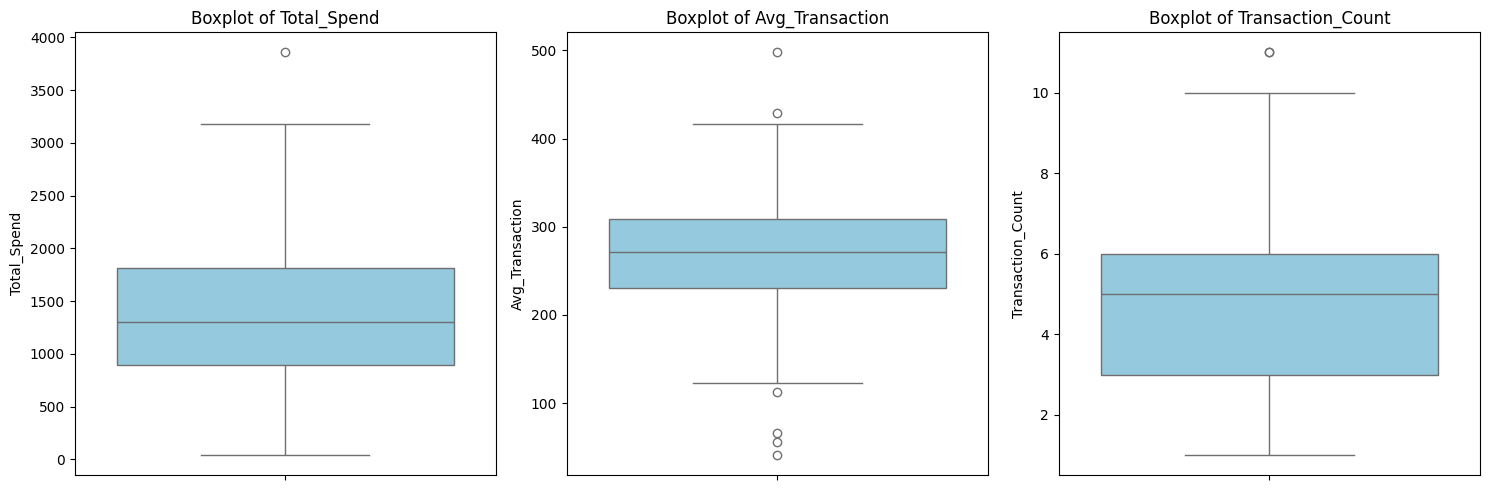

In [99]:
plt.figure(figsize=(15, 5))

columns = ['Total_Spend', 'Avg_Transaction', 'Transaction_Count']
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=customer_features[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#  Removing Outliers from the Columns Total_spend,Avg_Transaction,Transaction_Count

In [100]:
# Columns to process
columns = ['Total_Spend', 'Avg_Transaction', 'Transaction_Count']

# Remove outliers using a loop
for col in columns:
    Q1 = np.percentile(customer_features[col], 25)  # 25th percentile (Q1)
    Q3 = np.percentile(customer_features[col], 75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower Bound
    upper_bound = Q3 + 1.5 * IQR  # Upper Bound

    # Filter the dataset to keep values within the bounds
    customer_features = customer_features[
        (customer_features[col] >= lower_bound) & (customer_features[col] <= upper_bound)
    ]

# Display cleaned data
print("Cleaned Data (Outliers Removed):")
print(customer_features)

Cleaned Data (Outliers Removed):
    CustomerID  Total_Spend  Avg_Transaction  Transaction_Count
0        C0001      1391.67       278.334000                  5
1        C0002       835.68       208.920000                  4
2        C0003       782.83       195.707500                  4
3        C0004      1925.09       240.636250                  8
4        C0005       874.81       291.603333                  3
..         ...          ...              ...                ...
194      C0196      1667.97       416.992500                  4
195      C0197       681.17       227.056667                  3
196      C0198       479.41       239.705000                  2
197      C0199      1002.44       250.610000                  4
198      C0200      1482.53       296.506000                  5

[187 rows x 4 columns]


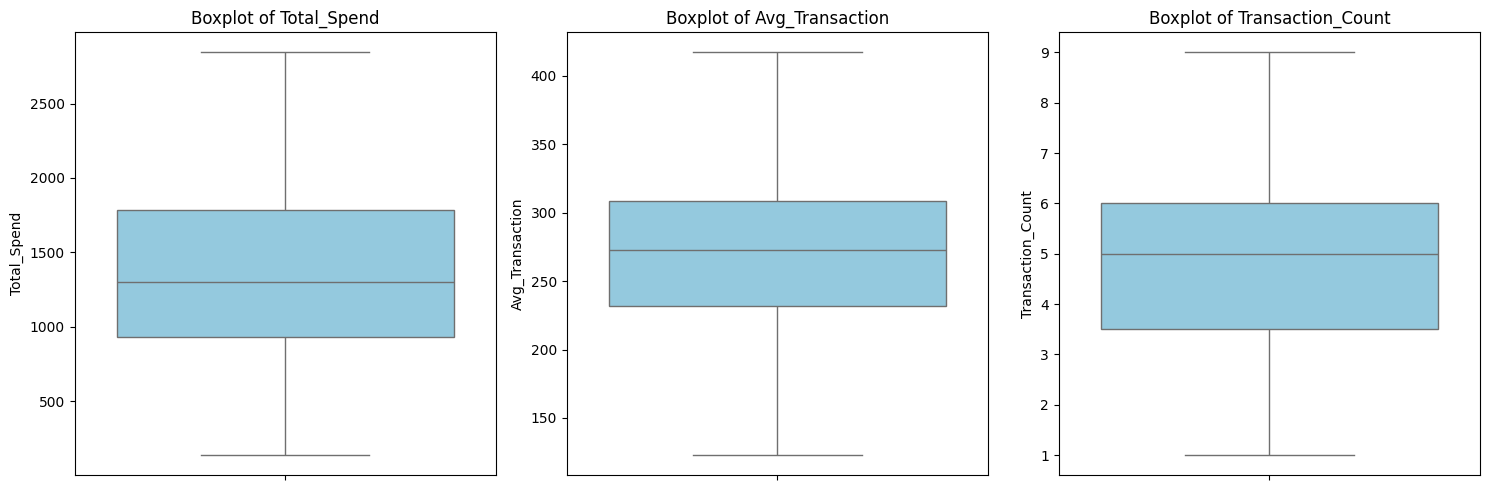

In [101]:
plt.figure(figsize=(15, 5))

columns = ['Total_Spend', 'Avg_Transaction', 'Transaction_Count']
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=customer_features[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [102]:
customer_features1=customer_features.drop('CustomerID',axis=1)
customer_features1.head()

,Total_Spend,Avg_Transaction,Transaction_Count
0,1391.67,278.334000,5
1,835.68,208.920000,4
2,782.83,195.707500,4
3,1925.09,240.636250,8
4,874.81,291.603333,3


# Elbow Method
to find/know cluster k values




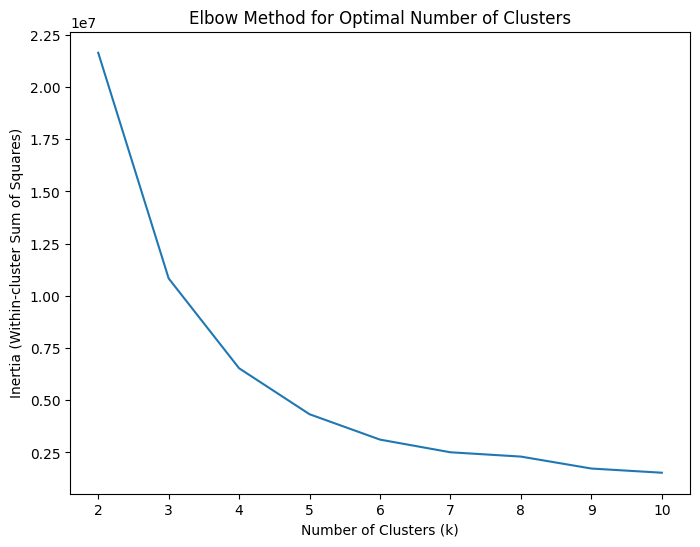

In [103]:
# Step 5: Elbow Method to determine optimal number of clusters
inertia = []
k_range = range(2, 11)  # Test for k between 2 and 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features1)
    inertia.append(kmeans.inertia_)

# Step 6: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


#DB index
The DB Index (Dunn's Index) is a metric used to evaluate the quality of clusters created by a clustering algorithm, such as K-Means.

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Assuming 'customer_features1' is a preprocessed DataFrame or numpy array
db_index_values = []
silhouette_scores = []

for k in range(2, 11):  # Loop over cluster sizes
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model and predict clusters
    cluster_labels = kmeans.fit_predict(customer_features1)

    # Calculate DB Index and Silhouette Score
    db_index = davies_bouldin_score(customer_features1, cluster_labels)
    silhouette = silhouette_score(customer_features1, cluster_labels)

    # Store the metrics
    db_index_values.append(db_index)
    silhouette_scores.append(silhouette)

    # Print the results for each k
    print(f"Clusters: {k}, DB Index: {db_index:.2f}, Silhouette Score: {silhouette:.2f}")


Clusters: 2, DB Index: 0.59, Silhouette Score: 0.56
Clusters: 3, DB Index: 0.58, Silhouette Score: 0.52
Clusters: 4, DB Index: 0.54, Silhouette Score: 0.52
Clusters: 5, DB Index: 0.56, Silhouette Score: 0.50
Clusters: 6, DB Index: 0.59, Silhouette Score: 0.49
Clusters: 7, DB Index: 0.60, Silhouette Score: 0.48
Clusters: 8, DB Index: 0.61, Silhouette Score: 0.44
Clusters: 9, DB Index: 0.62, Silhouette Score: 0.46
Clusters: 10, DB Index: 0.70, Silhouette Score: 0.42


# finding best optimal_cluster based on db_index

In [110]:
optimal_clusters = 2 + np.argmin(db_index_values)
optimal_clusters

4

# Final clustering with optimal clusters

In [111]:
# Final clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(customer_features1)

# plotting DB Index VS No. of Clusters

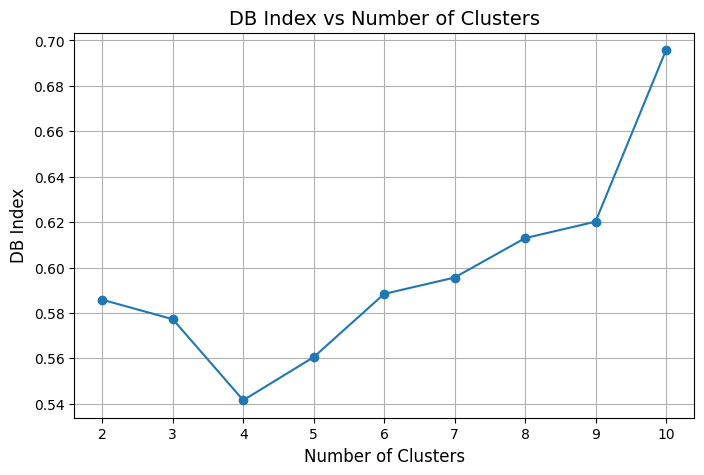

In [112]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_index_values, marker='o')
plt.title("DB Index vs Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("DB Index", fontsize=12)
plt.grid()
plt.show()

# k_means cluster prediction

In [113]:
kmeans=KMeans(n_clusters=optimal_clusters,init='k-means++',random_state=42)
prediction=kmeans.fit_predict(customer_features1)
print(prediction)

[0 2 2 3 2 0 0 2 2 0 3 1 2 2 3 3 0 0 2 1 3 1 3 2 0 0 1 2 0 0 2 0 0 2 0 0 0
 0 3 0 2 3 3 3 3 0 0 1 0 3 1 0 3 3 2 1 2 2 2 0 0 3 3 0 0 2 0 2 0 3 0 2 0 2
 0 1 2 3 0 0 3 0 2 3 2 0 1 2 2 3 2 1 1 1 1 1 3 1 3 0 3 3 2 2 2 3 3 0 3 0 3
 0 2 3 2 3 0 3 3 2 2 2 0 2 0 2 0 0 0 3 1 2 2 3 2 1 0 3 3 0 2 0 3 3 1 0 3 2
 0 3 3 3 0 3 0 2 3 0 3 3 0 1 0 2 0 0 3 3 0 0 1 0 0 3 1 0 0 0 0 0 3 0 3 2 2
 0 0]


#Scatter plot of Customer Segmentation

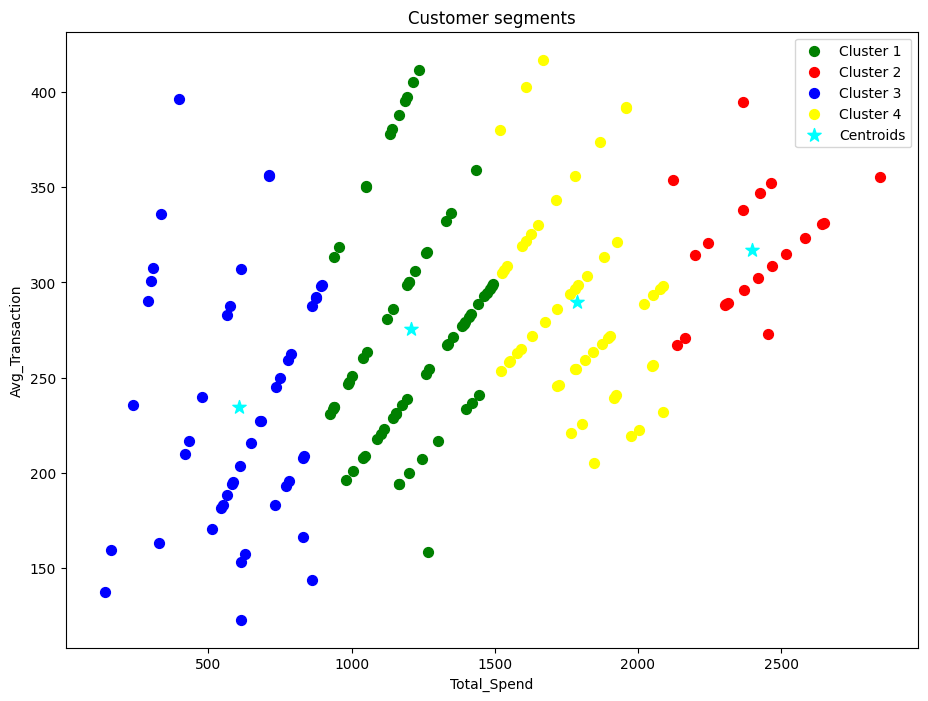

In [114]:
plt.figure(figsize=(11,8))
plt.scatter(customer_features1.loc[prediction==0, 'Total_Spend'],customer_features1.loc[prediction==0, 'Avg_Transaction'],s=50, c='green', label='Cluster 1')
plt.scatter(customer_features1.loc[prediction==1, 'Total_Spend'], customer_features1.loc[prediction==1, 'Avg_Transaction'], s=50, c='red', label='Cluster 2')
plt.scatter(customer_features1.loc[prediction==2, 'Total_Spend'], customer_features1.loc[prediction==2, 'Avg_Transaction'], s=50, c='blue', label='Cluster 3')
plt.scatter(customer_features1.loc[prediction==3, 'Total_Spend'], customer_features1.loc[prediction==3, 'Avg_Transaction'], s=50, c='yellow', label='Cluster 4')
#  plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker='*', c='cyan', label='Centroids')
plt.title('Customer segments')
plt.xlabel('Total_Spend')
plt.ylabel('Avg_Transaction')
plt.legend()
plt.show()

In [115]:
customer_features

,CustomerID,Total_Spend,Avg_Transaction,Transaction_Count,Cluster
0,C0001,1391.67,278.334000,5,0
1,C0002,835.68,208.920000,4,2
2,C0003,782.83,195.707500,4,2
3,C0004,1925.09,240.636250,8,3
4,C0005,874.81,291.603333,3,2
...,...,...,...,...,...
194,C0196,1667.97,416.992500,4,3
195,C0197,681.17,227.056667,3,2
196,C0198,479.41,239.705000,2,2
197,C0199,1002.44,250.610000,4,0


In [116]:
customer_features.to_csv('customer_features.csv', index=False)